<a href="https://colab.research.google.com/github/iamcoolshubham/Multinomial-NaiveBayes/blob/master/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tqdm
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

data = pd.read_csv('preprocessed_data.csv')
y=data.project_is_approved
data.drop(columns={"project_is_approved"},axis=0,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [153]:
print("No of datapoints in train:",len(X_train)," ",len(X_train)/len((data)))
print("No of datapoints in test:",len(X_test)," ",len(X_test)/len((data)))
print("No of datapoints in cv:",len(X_cv)," ",len(X_cv)/len((data)))

No of datapoints in train: 69918   0.6399934094903339
No of datapoints in test: 21850   0.20000366139425893
No of datapoints in cv: 17480   0.16000292911540714


### <h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>**bold text**

In [154]:
import nltk
nltk.download('punkt')
essay=data.essay
temp=list()
for i in essay:
    temp.extend(word_tokenize(i))
temp=pd.Series(temp)
from collections import Counter
counter=Counter(temp)
counter=counter.most_common(10300)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [155]:
nltk.download('stopwords')
temp=list()
for i in range(len(counter)):
    temp.append(counter[i][0])
temp
print(len(temp))
temp=set(temp)
temp=list(temp)
stop_words=set(stopwords.words("english"))
for i in temp:
    if i in stop_words:
        temp.remove(i)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
10300


In [156]:
len(temp)

10187

In [157]:
X_cv.shape

(17480, 8)

In [0]:
vectorizer=CountVectorizer()
vectorizer.fit(temp)
essay_train_bow=vectorizer.transform(X_train["essay"].values)
essay_test_bow=vectorizer.transform(X_test['essay'].values)
essay_cv_bow=vectorizer.transform(X_cv["essay"].values)


In [159]:
print(essay_train_bow.shape)
print(essay_test_bow.shape)
print(essay_cv_bow.shape)


(69918, 10159)
(21850, 10159)
(17480, 10159)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
school_state=data.school_state
vectorizer.fit(X_train['school_state'])
train_school_bow=vectorizer.transform(X_train['school_state'])
test_school_bow=vectorizer.transform(X_test['school_state'])
cv_school_bow=vectorizer.transform(X_cv['school_state'])

In [0]:
teacher_prefix=data.teacher_prefix
vectorizer.fit(X_train['teacher_prefix'])
train_teacher_bow=vectorizer.transform(X_train['teacher_prefix'])
test_teacher_bow=vectorizer.transform(X_test['teacher_prefix'])
cv_teacher_bow=vectorizer.transform(X_cv['teacher_prefix'])

In [0]:
project_grade_category=data.project_grade_category
vectorizer.fit(X_train['project_grade_category'])
train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'])
test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'])
cv_project_grade_category_bow=vectorizer.transform(X_cv['project_grade_category'])

In [0]:
clean_categories=data.clean_categories
vectorizer.fit(X_train['clean_categories'])
train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'])
test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'])
cv_clean_categories_bow=vectorizer.transform(X_cv['clean_categories'])


In [0]:
clean_sub_categories=data.clean_subcategories
vectorizer.fit(X_train['clean_subcategories'])
train_clean_sub_categories_bow=vectorizer.transform(X_train['clean_subcategories'])
test_clean_sub_categories_bow=vectorizer.transform(X_test['clean_subcategories'])
cv_clean_sub_categories_bow=vectorizer.transform(X_cv['clean_subcategories'])


In [0]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))


In [0]:
previously_posted_projects=data.teacher_number_of_previously_posted_projects
X_train_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [0]:
from scipy.sparse import hstack
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_train_previously_posted_projects=X_train_previously_posted_projects.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)
X_test_previously_posted_projects=X_test_previously_posted_projects.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_cv_previously_posted_projects=X_cv_previously_posted_projects.reshape(-1,1)

In [0]:
X_tr=hstack((essay_train_bow,train_school_bow,train_teacher_bow,train_project_grade_category_bow,
            train_clean_categories_bow,train_clean_sub_categories_bow,X_train_price_norm,X_train_previously_posted_projects)).tocsr()
X_te=hstack((essay_test_bow,test_school_bow,test_teacher_bow,test_project_grade_category_bow,
            test_clean_categories_bow,test_clean_sub_categories_bow,X_test_price_norm,X_test_previously_posted_projects)).tocsr()
X_cv=hstack((essay_cv_bow,cv_school_bow,cv_teacher_bow,cv_project_grade_category_bow,
            cv_clean_categories_bow,cv_clean_sub_categories_bow,X_cv_price_norm,X_cv_previously_posted_projects)).tocsr()

In [169]:
print(X_train_previously_posted_projects.shape)
print(essay_train_bow.shape)
print(train_school_bow.shape)
print(train_teacher_bow.shape)
print(train_project_grade_category_bow.shape)
print(train_clean_categories_bow.shape)
print(train_clean_sub_categories_bow.shape)
print(X_train_price_norm.shape)

(69918, 1)
(69918, 10159)
(69918, 51)
(69918, 5)
(69918, 4)
(69918, 9)
(69918, 30)
(69918, 1)


In [172]:
print(X_tr.shape)
print(X_te.shape)
print(X_cv.shape)

(69918, 10260)
(21850, 10260)
(17480, 10260)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
y_train=np.array(y_train)
y_cv=np.array(y_cv)
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
parameter=np.array([0.0001,0.0002,0.005,0.05,0.01,1,69,150,780,1000])


In [174]:
X_cv.shape

(17480, 10260)

In [175]:
train_acc=list()
cv_acc=list()
for i in tqdm(range((len(parameter)))):
    clf=MultinomialNB(alpha=parameter[i])
    clf.fit(X_tr.toarray(),y_train)
    cv_pred=clf.predict_proba(X_cv.toarray())
    train_pred=clf.predict_proba(X_tr.toarray())
    t=roc_auc_score(y_cv,cv_pred[:,1])
    print(t)
    cv_acc.append(t)
    train_acc.append(roc_auc_score(y_train,train_pred[:,1]))
    
    


 10%|█         | 1/10 [00:07<01:06,  7.34s/it]

0.7039126019845019



 20%|██        | 2/10 [00:14<00:57,  7.18s/it]

0.7043182261058268



 30%|███       | 3/10 [00:20<00:49,  7.06s/it]

0.706495635032629



 40%|████      | 4/10 [00:27<00:41,  6.97s/it]

0.708176086917155



 50%|█████     | 5/10 [00:34<00:34,  6.91s/it]

0.7070040405266532



 60%|██████    | 6/10 [00:41<00:27,  6.87s/it]

0.7080495044806998



 70%|███████   | 7/10 [00:48<00:20,  6.85s/it]

0.6057810580768623



 80%|████████  | 8/10 [00:54<00:13,  6.84s/it]

0.5209039177926285



 90%|█████████ | 9/10 [01:01<00:06,  6.81s/it]

0.5000878054224707



100%|██████████| 10/10 [01:08<00:00,  6.84s/it]

0.500188893086513


In [176]:
print(train_acc)
print(cv_acc)

[0.7678693755387686, 0.7677626019077164, 0.7669177754620738, 0.7655512844033523, 0.7666160571898025, 0.7570980695960807, 0.6196529068707729, 0.526128036940943, 0.49999666712992524, 0.5000219466350205]
[0.7039126019845019, 0.7043182261058268, 0.706495635032629, 0.708176086917155, 0.7070040405266532, 0.7080495044806998, 0.6057810580768623, 0.5209039177926285, 0.5000878054224707, 0.500188893086513]


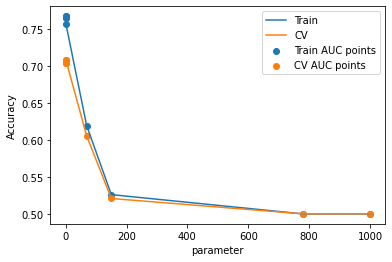

In [177]:
plt.plot(parameter,train_acc,label="Train")
plt.plot(parameter,cv_acc,label="CV")
plt.scatter(parameter, train_acc, label='Train AUC points')
plt.scatter(parameter, cv_acc, label='CV AUC points')
plt.xlabel("parameter")
plt.ylabel("Accuracy")
plt.legend()

In [178]:
index=cv_acc.index(max(cv_acc))
print("Maximum Accuracy =" ,cv_acc[index])
print("Alpha Value =",parameter[index])

Maximum Accuracy = 0.708176086917155
Alpha Value = 0.05


In [179]:
clf=BernoulliNB(alpha=1)
clf.fit(X_tr[0:50000,].toarray(),y_train[0:50000])

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
test_predict=clf.predict_proba(X_te)
test_predict=np.array(test_predict)
train_predict=clf.predict_proba(X_tr)
train_predict=np.array(train_predict)

In [181]:
print(roc_auc_score(y_test,test_predict[:,1]))

0.6983933302439496


In [0]:
from sklearn.metrics import roc_curve,auc

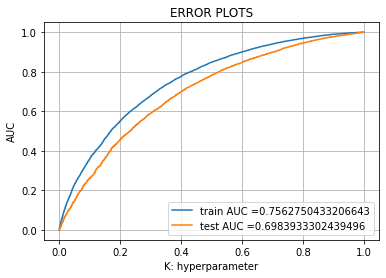

In [183]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predict[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predict[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

[[ 3763  3055]
 [ 6100 32082]]


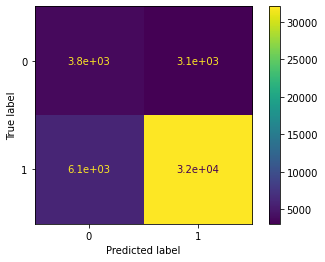

In [184]:
disp = plot_confusion_matrix(clf,X_tr[0:45000,].toarray(),y_train[0:45000])
print(disp.confusion_matrix)

In [185]:
import pickle
import joblib
filename="bernoulialgo.sav"
joblib.dump(clf,filename)

['bernoulialgo.sav']

**bold text**TF-IDF

In [0]:

data = pd.read_csv('preprocessed_data.csv')
y=data.project_is_approved
data.drop(columns={"project_is_approved"},axis=0,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [188]:
len(temp)

10187

In [0]:

data = pd.read_csv('preprocessed_data.csv')
y=data.project_is_approved
data.drop(columns={"project_is_approved"},axis=0,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(temp)
essay_train=vectorizer.transform(X_train.essay)
essay_test=vectorizer.transform(X_test.essay)
essay_cv=vectorizer.transform(X_cv.essay)


In [191]:
print("Shape of matrix after one hot encodig ",essay_train.shape)
print("Shape of matrix after one hot encodig ",essay_test.shape)
print("Shape of matrix after one hot encodig ",essay_cv.shape)

Shape of matrix after one hot encodig  (69918, 10159)
Shape of matrix after one hot encodig  (21850, 10159)
Shape of matrix after one hot encodig  (17480, 10159)


In [0]:
school_state=data.school_state
vectorizer.fit(X_train['school_state'])
train_school_bow=vectorizer.transform(X_train['school_state'])
test_school_bow=vectorizer.transform(X_test['school_state'])
cv_school_bow=vectorizer.transform(X_cv['school_state'])

In [0]:
teacher_prefix=data.teacher_prefix
vectorizer.fit(X_train['teacher_prefix'])
train_teacher_bow=vectorizer.transform(X_train['teacher_prefix'])
test_teacher_bow=vectorizer.transform(X_test['teacher_prefix'])
cv_teacher_bow=vectorizer.transform(X_cv['teacher_prefix'])

In [0]:
project_grade_category=data.project_grade_category
vectorizer.fit(X_train['project_grade_category'])
train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'])
test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'])
cv_project_grade_category_bow=vectorizer.transform(X_cv['project_grade_category'])

In [0]:
clean_categories=data.clean_categories
vectorizer.fit(X_train['clean_categories'])
train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'])
test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'])
cv_clean_categories_bow=vectorizer.transform(X_cv['clean_categories'])


In [0]:
clean_sub_categories=data.clean_subcategories
vectorizer.fit(X_train['clean_subcategories'])
train_clean_sub_categories_bow=vectorizer.transform(X_train['clean_subcategories'])
test_clean_sub_categories_bow=vectorizer.transform(X_test['clean_subcategories'])
cv_clean_sub_categories_bow=vectorizer.transform(X_cv['clean_subcategories'])


In [0]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))


In [0]:
previously_posted_projects=data.teacher_number_of_previously_posted_projects
X_train_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [0]:
from scipy.sparse import hstack
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_train_previously_posted_projects=X_train_previously_posted_projects.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)
X_test_previously_posted_projects=X_test_previously_posted_projects.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_cv_previously_posted_projects=X_cv_previously_posted_projects.reshape(-1,1)

In [0]:
X_tr=hstack((essay_train_bow,train_school_bow,train_teacher_bow,train_project_grade_category_bow,
            train_clean_categories_bow,train_clean_sub_categories_bow,X_train_price_norm,X_train_previously_posted_projects)).tocsr()
X_te=hstack((essay_test_bow,test_school_bow,test_teacher_bow,test_project_grade_category_bow,
            test_clean_categories_bow,test_clean_sub_categories_bow,X_test_price_norm,X_test_previously_posted_projects)).tocsr()
X_cv=hstack((essay_cv_bow,cv_school_bow,cv_teacher_bow,cv_project_grade_category_bow,
            cv_clean_categories_bow,cv_clean_sub_categories_bow,X_cv_price_norm,X_cv_previously_posted_projects)).tocsr()

In [201]:
print(X_train_previously_posted_projects.shape)
print(essay_train_bow.shape)
print(train_school_bow.shape)
print(train_teacher_bow.shape)
print(train_project_grade_category_bow.shape)
print(train_clean_categories_bow.shape)
print(train_clean_sub_categories_bow.shape)
print(X_train_price_norm.shape)

(69918, 1)
(69918, 10159)
(69918, 51)
(69918, 5)
(69918, 4)
(69918, 9)
(69918, 30)
(69918, 1)


In [0]:
y_train=np.array(y_train)
y_cv=np.array(y_cv)
from tqdm import tqdm
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
parameter=np.array([0.0001,0.0002,0.005,0.05,0.01,1,30,35,69,90,150,300,780,1000])


In [205]:
train_acc=list()
cv_acc=list()
for i in tqdm(range((len(parameter)))):
    clf=MultinomialNB(alpha=parameter[i])
    clf.fit(X_tr.toarray(),y_train)
    cv_pred=clf.predict_proba(X_cv.toarray())
    train_pred=clf.predict_proba(X_tr.toarray())
    t=roc_auc_score(y_cv,cv_pred[:,1])
    print(t)
    cv_acc.append(t)
    train_acc.append(roc_auc_score(y_train,train_pred[:,1]))
    
    



  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:07<01:31,  7.02s/it]

0.5080997987135506




 14%|█▍        | 2/14 [00:14<01:24,  7.02s/it]

0.5080992893274884




 21%|██▏       | 3/14 [00:21<01:17,  7.01s/it]

0.5080941954668665




 29%|██▊       | 4/14 [00:27<01:09,  6.99s/it]

0.5081340676608848




 36%|███▌      | 5/14 [00:34<01:02,  6.98s/it]

0.508089776542777




 43%|████▎     | 6/14 [00:41<00:55,  6.96s/it]

0.5085387239486915




 50%|█████     | 7/14 [00:48<00:48,  6.96s/it]

0.5023445639631112




 57%|█████▋    | 8/14 [00:55<00:41,  6.96s/it]

0.5016799934370699




 64%|██████▍   | 9/14 [01:02<00:34,  6.96s/it]

0.5002085681231652




 71%|███████▏  | 10/14 [01:09<00:27,  6.96s/it]

0.5001145354560843




 79%|███████▊  | 11/14 [01:16<00:20,  6.95s/it]

0.5046831553746431




 86%|████████▌ | 12/14 [01:23<00:13,  6.95s/it]

0.4980670072404899




 93%|█████████▎| 13/14 [01:30<00:06,  6.94s/it]

0.4998651655093373




100%|██████████| 14/14 [01:37<00:00,  6.95s/it]

0.4999325827546686


In [206]:
print(train_acc)
print(cv_acc)

[0.7348713938889064, 0.7348714145850186, 0.7348629514671218, 0.7347412248949772, 0.7348536031924243, 0.7258698140957549, 0.5413639535880003, 0.5366858895500358, 0.5217424471771177, 0.5174299003614173, 0.5059399672934881, 0.5003245309599884, 0.5001079779855837, 0.5000776040528605]
[0.5080997987135506, 0.5080992893274884, 0.5080941954668665, 0.5081340676608848, 0.508089776542777, 0.5085387239486915, 0.5023445639631112, 0.5016799934370699, 0.5002085681231652, 0.5001145354560843, 0.5046831553746431, 0.4980670072404899, 0.4998651655093373, 0.4999325827546686]


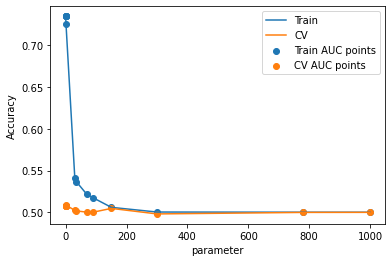

In [207]:
plt.plot(parameter,train_acc,label="Train")
plt.plot(parameter,cv_acc,label="CV")
plt.scatter(parameter, train_acc, label='Train AUC points')
plt.scatter(parameter, cv_acc, label='CV AUC points')
plt.xlabel("parameter")
plt.ylabel("Accuracy")
plt.legend()

In [208]:
index=cv_acc.index(max(cv_acc))
print("Maximum Accuracy =" ,cv_acc[index])
print("Alpha Value =",parameter[index])

Maximum Accuracy = 0.5085387239486915
Alpha Value = 1.0


In [209]:
clf=BernoulliNB(alpha=1)
clf.fit(X_tr[0:50000,].toarray(),y_train[0:50000])

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
test_predict=clf.predict_proba(X_te)
test_predict=np.array(test_predict)
train_predict=clf.predict_proba(X_tr)
train_predict=np.array(train_predict)

In [211]:
print(roc_auc_score(y_test,test_predict[:,1]))

0.5146093049056119


In [0]:
from sklearn.metrics import roc_curve,auc

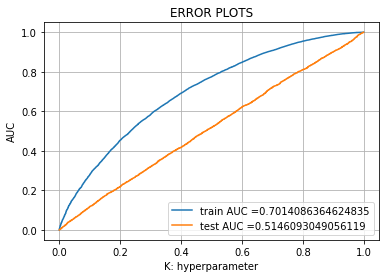

In [214]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predict[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predict[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [215]:
import pickle
import joblib
filename="bernoulitfidf.sav"
joblib.dump(clf,filename)

['bernoulitfidf.sav']

In [0]:
from sklearn.metrics import plot_confusion_matrix

[[ 1643  5179]
 [ 1347 36831]]


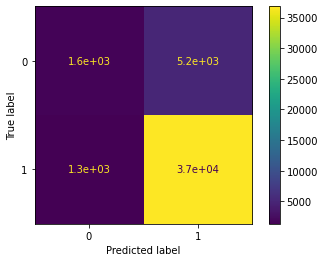

In [217]:
disp = plot_confusion_matrix(clf,X_tr[0:45000,].toarray(),y_train[0:45000])
print(disp.confusion_matrix)

Summary

# **vectorizer**        **Model**          **HyperParameter**            **AUC**
                                      

1.   **BOW**              **Brute**             **0.05**         **0.69** 
2.   **TF-idf**       **Brute**               **1**                **0.51**




> Indented block



So After performing analysis I conclude that when I used Bow representation with Multinomial Bayes Theorem with alpha value of 0.05 the i got an auc sore of 0.698 on test data and 0.71 on cross-validation data.

When I used tf-idf representation with Multinomial Naive Bayes with alpha value of 1 then i got an auc score of 0.51 on test data.